In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [43]:
Behav = pd.read_csv("/Users/xinyuyangren/Documents/TU:e_Year2/Thesis"
                    "/Aramis_Data_Warehouse/Behavior_Study/0900_Behav.csv")

#for 5,7,8,9 to rename br1 to br3

Behav.rename(columns={'t_br1':'t_br3','rh_br1':'rh_br3','co2_br1':'co2_br3','con_br1':'con_br3','wc_br1':'wc_br3'}, inplace=True)

In [44]:
# Remap string t and f to 1 and 0, for the consequent classifying
def remap(x):
    if x == 't':
        x = 'Closed'
    else:
        x = 'Open'
    return x

for col in ['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic']:
    w = Behav[col].apply(remap)
    Behav[col] = w

In [51]:
#generate month/hour attribute from datetime string
Behav.dt = pd.to_datetime(Behav.dt)
t = pd.DatetimeIndex(Behav.dt)
hr = t.hour
Behav['HourOfDay'] = hr
day = t.dayofyear
Behav['Day'] = day
month = t.month
Behav['Month'] = month
yr = t.year
Behav['Year'] = yr
#dt = Behav.pop('dt')

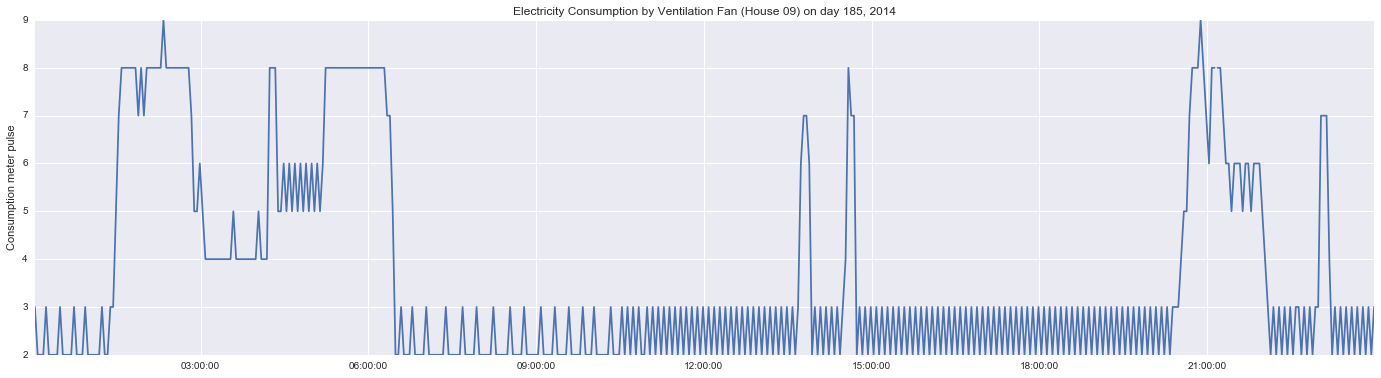

In [82]:
fig = plt.figure(figsize=(24,6))
Behav_2014 = Behav[(Behav.Year == 2014) & (Behav.Day == 185)]
pulse = Behav_2014['pulse_channel_ventilation_unit']
plt.plot(Behav_2014['dt'],pulse)
plt.title('Electricity Consumption by Ventilation Fan (House 09) on day 185, 2014')
plt.ylabel('Consumption meter pulse')
plt.savefig('/Users/xinyuyangren/Desktop/Ventilation_Position/pulsedemo.png')
pulse = pulse.dropna()
pulse.to_csv('/Users/xinyuyangren/Desktop/Ventilation_Position/pulsedemo.csv',index=False)

In [34]:
# Dividing the 4 seasons
Behav_Spring = Behav[(Behav.Month >= 3) & (Behav.Month <= 5)]
Behav_Spring['Season']='Spring'
Behav_Summer = Behav[(Behav.Month >= 6) & (Behav.Month <= 8)]
Behav_Summer['Season']='Summer'
Behav_Autumn = Behav[(Behav.Month >= 9) & (Behav.Month <= 11)]
Behav_Autumn['Season']='Autumn'
Behav_Winter_1 = Behav[(Behav.Month >= 12)]
Behav_Winter_2 = Behav[(Behav.Month <= 2)]      
Behav_Winter = pd.concat([Behav_Winter_1,Behav_Winter_2])
Behav_Winter['Season']='Winter'
Behav_seasons = pd.concat([Behav_Spring,Behav_Summer,Behav_Autumn,Behav_Winter])
#Behav_Winter.to_csv('/Users/xinyuyangren/Desktop/0200_winter')

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [35]:
#Mean pulse break down by seasons
Vent = Behav_seasons[['pulse_channel_ventilation_unit','Season']]
Vent_1 = Vent[Vent['Season']=='Spring']
Vent_2 = Vent[Vent['Season']=='Summer']
Vent_3 = Vent[Vent['Season']=='Autumn']
Vent_4 = Vent[Vent['Season']=='Winter']
avg1 = np.mean(Vent_1['pulse_channel_ventilation_unit'])
avg2 = np.mean(Vent_2['pulse_channel_ventilation_unit'])
avg3 = np.mean(Vent_3['pulse_channel_ventilation_unit'])
avg4 = np.mean(Vent_4['pulse_channel_ventilation_unit'])
print avg1,avg2,avg3,avg4

5.30300798466 5.99357418579 5.27618560218 4.79861101561


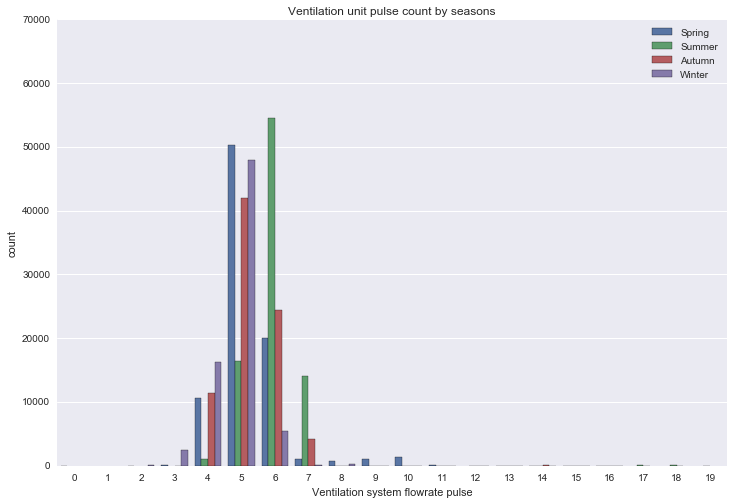

In [36]:
plt.figure(figsize=(12,8))
seq = range (0,20)
sns.countplot( x ="pulse_channel_ventilation_unit",hue = "Season",data = Behav_seasons,order = seq)
plt.xlabel('Ventilation system flowrate pulse')
plt.ylim(0,70000)
plt.title('Ventilation unit pulse count by seasons')
plt.legend(loc = 'upper right')

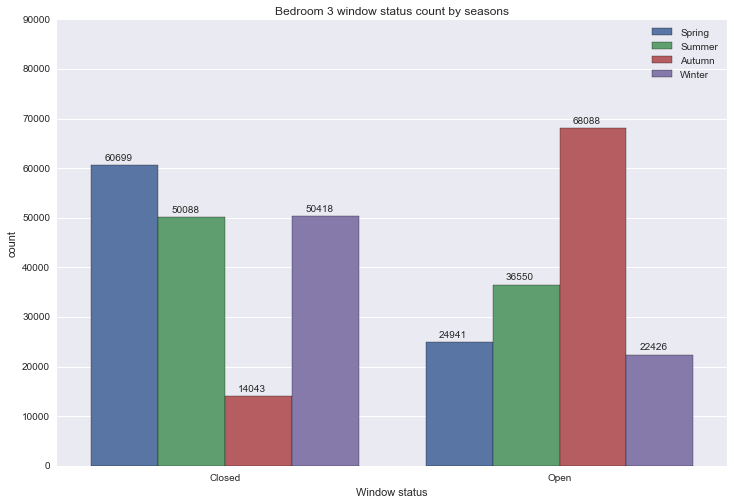

In [37]:
plt.figure(figsize=(12,8))
ax = sns.countplot( x ="wc_br3",hue = "Season",data = Behav_seasons,order = ['Closed','Open'])
plt.title('Bedroom 3 window status count by seasons')
plt.xlabel('Window status')
plt.legend(loc = 'upper right')
plt.ylim(0,90000)

for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.04, p.get_height() + 1000))